<a href="https://colab.research.google.com/github/KimyYoungWook/DataScience/blob/main/practice/1970%EB%85%84%EB%8C%80%EB%B3%B4%EC%8A%A4%ED%84%B4_%EC%A3%BC%ED%83%9D%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1970년대 보스턴 지역의 주택 가격 예측 => 회귀

데이터 준비하기

In [1]:
from tensorflow.keras.datasets.boston_housing import load_data

# 텐서플로우 저장소에서 데이터를 다운받습니다.
(X_train, y_train), (X_test, y_test) = load_data(path='boston_housing.npz',
                                                 test_split=0.2,
                                                 seed=777)

57344/57026 [==============================] - 0s 0us/step


데이터 형태 확인하기

In [3]:
# 훈련데이터 
print(X_train.shape,y_train.shape)

# 테스트 데이터
print(X_test.shape,y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


데이터 전처리 및 검증 데이터셋 만들기

In [6]:
import numpy as np
np.set_printoptions(suppress=True)
print(X_train[0])

[  0.25199   0.       10.59      0.        0.489     5.783    72.7
   4.3549    4.      277.       18.6     389.43     18.06   ]


In [8]:
# 데이터 전처리 -> 표준화(Standardization)

mean =np.mean(X_train,axis=0)
std=np.std(X_train,axis=0)

#데이터 (훈련,테스트 데이터 모두) -평균 /표준편자
X_train =(X_train-mean) /std
X_test =(X_test-mean) /std

print(X_train[0])

[-0.40102395 -0.48033655 -0.12089418 -0.28828791 -0.58254176 -0.68137272
  0.11117586  0.26484408 -0.65187119 -0.80249043  0.0756568   0.37366783
  0.69211835]


In [9]:
# 검증 데이터 세트 만들기
from sklearn.model_selection import train_test_split

# 훈련/검증 데이터를 7:3 비율로 분리
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,
                                               test_size=0.33,
                                               random_state=777)

In [10]:
print(X_train.shape,X_val.shape)

(270, 13) (134, 13)


모델 구성하기

In [11]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

model = Sequential()
model.add(Dense(64, activation='relu',input_shape=(13,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1)) # 하나의 값을 출력 -> 주택 가격

모델 설정하기

In [12]:
model.compile(loss='mse', # 연속적인 값이라 정확한 예측이 불가
              optimizer='adam', # 그렇기 때문에 오차를 본다
              metrics=['mae','mse'])

모델 학습하기

In [13]:
history =model.fit(X_train,y_train,
                    epochs=300,
                    validation_data=(X_val,y_val))

Epoch 1/300
9/9 [==============================] - 16s 64ms/step - loss: 572.9867 - mae: 22.3305 - mse: 572.9867 - val_loss: 609.8019 - val_mae: 22.5427 - val_mse: 609.8019
Epoch 2/300
9/9 [==============================] - 0s 4ms/step - loss: 533.4114 - mae: 21.5156 - mse: 533.4114 - val_loss: 585.2750 - val_mae: 21.9819 - val_mse: 585.2750
Epoch 3/300
9/9 [==============================] - 0s 4ms/step - loss: 529.8707 - mae: 21.2888 - mse: 529.8707 - val_loss: 559.9597 - val_mae: 21.4015 - val_mse: 559.9597
Epoch 4/300
9/9 [==============================] - 0s 6ms/step - loss: 497.2070 - mae: 20.6052 - mse: 497.2070 - val_loss: 529.9921 - val_mae: 20.6995 - val_mse: 529.9921
Epoch 5/300
9/9 [==============================] - 0s 5ms/step - loss: 463.5455 - mae: 19.6576 - mse: 463.5455 - val_loss: 492.9766 - val_mae: 19.7960 - val_mse: 492.9766
Epoch 6/300
9/9 [==============================] - 0s 7ms/step - loss: 407.2572 - mae: 18.2750 - mse: 407.2572 - val_loss: 447.2687 - val_mae: 

모델 결과 그리기

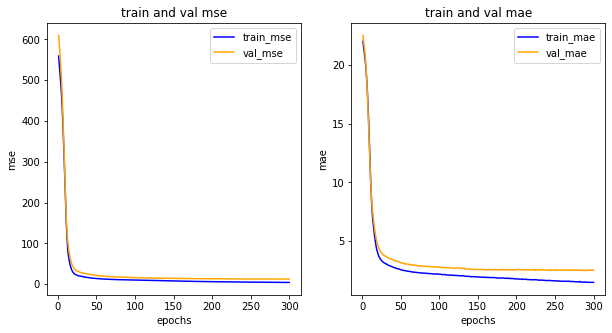

In [14]:
import matplotlib.pyplot as plt

his_dict = history.history
mse = his_dict['mse']
val_mse = his_dict['val_mse'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(mse) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, mse, color = 'blue', label = 'train_mse')
ax1.plot(epochs, val_mse, color = 'orange', label = 'val_mse')
ax1.set_title('train and val mse')
ax1.set_xlabel('epochs')
ax1.set_ylabel('mse')
ax1.legend()

mae = his_dict['mae']
val_mae = his_dict['val_mae']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, color = 'blue', label = 'train_mae')
ax2.plot(epochs, val_mae, color = 'orange', label = 'val_mae')
ax2.set_title('train and val mae')
ax2.set_xlabel('epochs')
ax2.set_ylabel('mae')
ax2.legend()

plt.show()


모델 평가하기

In [15]:
model.evaluate(X_test,y_test) #mae 2.25 -> 2250 달러정도

4/4 [==============================] - 0s 4ms/step - loss: 9.7367 - mae: 2.2530 - mse: 9.7367


[9.736662864685059, 2.252999782562256, 9.736662864685059]

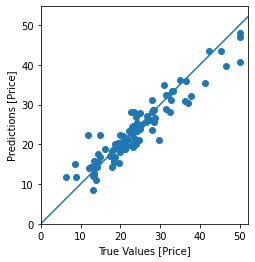

In [17]:
test_predictions = model.predict(X_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])